In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Property Assessment 2018 Data

## Changing data type
- To change the datatype of the nb_id column
- Tutorial [Changing data type of pandas series](https://www.ritchieng.com/pandas-changing-datatype/)

In [110]:
df = pd.read_csv('Property_Assessment_Data__Current_Calendar_Year_.csv')
# , dtype={'Account Number':int32, 'Neighbourhood ID':int32}
print(df.head())
print(df.tail())

   Account Number Suite  House Number        Street Name  Assessed Value  \
0         1315092  1005       10011.0      123 STREET NW          259000   
1         9201484   NaN        8503.0       52 STREET NW          312500   
2         4225520   NaN         811.0     113B STREET NW          441000   
3        10038386   NaN        1235.0  MCKINNEY COURT NW          488000   
4         3908589   103       11520.0      100 AVENUE NW           69000   

  Assessment Class  Neighbourhood ID    Neighbourhood    Ward Garage  \
0      Residential            1150.0           OLIVER  Ward 6      N   
1      Residential            6350.0       KENILWORTH  Ward 8      Y   
2      Residential            5511.0      TWIN BROOKS  Ward 9      Y   
3      Residential            5476.0  MAGRATH HEIGHTS  Ward 9      Y   
4  Non Residential            1150.0           OLIVER  Ward 6      N   

    Latitude   Longitude  
0  53.540949 -113.533619  
1  53.519952 -113.419429  
2  53.437892 -113.525607  
3 

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [111]:
df.drop('Account Number', axis=1, inplace=True)

In [112]:
# The nb column is short for neighbourhood and nb_id is neighbourhood ID.
# value is the assessed value of the home.
df.columns = ['suite', 'number', 'street', 'value', 'class', 'nb_id', 'nb', 'ward', 'garage', 'lat', 'long']

# Output the new column names
df.columns

Index(['suite', 'number', 'street', 'value', 'class', 'nb_id', 'nb', 'ward',
       'garage', 'lat', 'long'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393932 entries, 0 to 393931
Data columns (total 11 columns):
suite     78960 non-null object
number    351624 non-null float64
street    351624 non-null object
value     393932 non-null int64
class     393932 non-null object
nb_id     393931 non-null float64
nb        393931 non-null object
ward      393931 non-null object
garage    393932 non-null object
lat       393932 non-null float64
long      393932 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 33.1+ MB


In [114]:
df.columns

Index(['suite', 'number', 'street', 'value', 'class', 'nb_id', 'nb', 'ward',
       'garage', 'lat', 'long'],
      dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393932 entries, 0 to 393931
Data columns (total 11 columns):
suite     78960 non-null object
number    351624 non-null float64
street    351624 non-null object
value     393932 non-null int64
class     393932 non-null object
nb_id     393931 non-null float64
nb        393931 non-null object
ward      393931 non-null object
garage    393932 non-null object
lat       393932 non-null float64
long      393932 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 33.1+ MB


In [117]:
df['value'].describe()

count    3.939320e+05
mean     4.664371e+05
std      3.653638e+06
min      0.000000e+00
25%      1.830000e+05
50%      3.240000e+05
75%      4.245000e+05
max      1.272721e+09
Name: value, dtype: float64

In [120]:
# Drop the index 390296 for missing values
df.drop(390296, inplace=True)

In [121]:
df['nb_id'] = df['nb_id'].astype(int)

In [130]:
df.dtypes

suite      object
number    float64
street     object
value       int64
class      object
nb_id       int64
nb         object
ward       object
garage     object
lat       float64
long      float64
dtype: object

In [137]:
# Filtering for only the residential homes
print(df['class'].unique())

df_res = df[df['class'] == 'Residential']

['Residential' 'Non Residential' 'Other Residential' 'Farmland']


In [140]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370781 entries, 0 to 393930
Data columns (total 11 columns):
suite     77884 non-null object
number    330295 non-null float64
street    330295 non-null object
value     370781 non-null int64
class     370781 non-null object
nb_id     370781 non-null int64
nb        370781 non-null object
ward      370781 non-null object
garage    370781 non-null object
lat       370781 non-null float64
long      370781 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 33.9+ MB


In [144]:
print(df_res['value'].median())
df_res['value'].describe()

321500.0


count    3.707810e+05
mean     3.203335e+05
std      2.968436e+05
min      0.000000e+00
25%      1.840000e+05
50%      3.215000e+05
75%      4.145000e+05
max      4.161150e+07
Name: value, dtype: float64

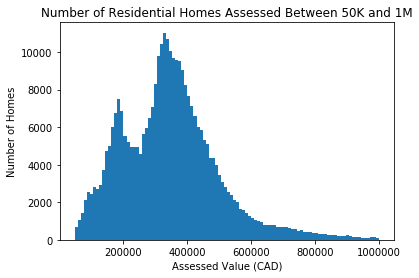

In [175]:
# Generate a plot of residential homes and minimize outliers.
ax = df_res['value'].plot(kind='hist', bins=100, range=(50000,1000000), title='Number of Residential Homes Assessed Between 50K and 1M')
ax.set_xlabel('Assessed Value (CAD)')
ax.set_ylabel('Number of Homes')

#save plot to local memory
plt.savefig('residential_homes_50K-1M.png')
plt.show()

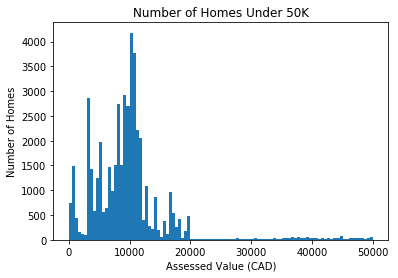

In [177]:
ax = df_res['value'].plot(kind='hist', bins=100, range=(0,50000), title='Number of Homes Under 50K')
ax.set_ylabel('Number of Homes')
ax.set_xlabel('Assessed Value (CAD)')

plt.savefig('residential_homes_<50K.png')
plt.show()

In [183]:
df_res_avg = df_res[df_res['value'].between(50000,1000000)]
print(df_res_avg.head())

  suite   number             street   value        class  nb_id  \
0  1005  10011.0      123 STREET NW  259000  Residential   1150   
1   NaN   8503.0       52 STREET NW  312500  Residential   6350   
2   NaN    811.0     113B STREET NW  441000  Residential   5511   
3   NaN   1235.0  MCKINNEY COURT NW  488000  Residential   5476   
5   NaN  14755.0       25 STREET NW  194000  Residential   2280   

                nb    ward garage        lat        long  
0           OLIVER  Ward 6      N  53.540949 -113.533619  
1       KENILWORTH  Ward 8      Y  53.519952 -113.419429  
2      TWIN BROOKS  Ward 9      Y  53.437892 -113.525607  
3  MAGRATH HEIGHTS  Ward 9      Y  53.449953 -113.565005  
5           FRASER  Ward 4      N  53.610727 -113.376475  


340000.0


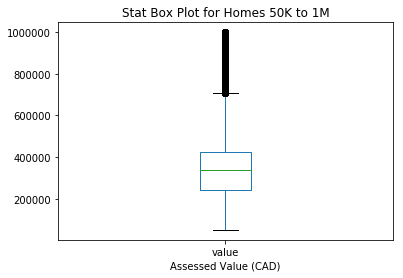

In [191]:
print(df_res_avg['value'].median())
ax = df_res_avg['value'].plot(kind='box', title='Stat Box Plot for Homes 50K to 1M')
ax.set_xlabel('Assessed Value (CAD)')

plt.savefig('residental_box_50K_1M.png')
plt.show()

In [193]:
df_res_avg['value'].describe()

count     320228.000000
mean      348016.716215
std       151722.829765
min        50000.000000
25%       240000.000000
50%       340000.000000
75%       426500.000000
max      1000000.000000
Name: value, dtype: float64

In [194]:
df.columns

Index(['suite', 'number', 'street', 'value', 'class', 'nb_id', 'nb', 'ward',
       'garage', 'lat', 'long'],
      dtype='object')

In [196]:
df_grouped = df.groupby(['nb_id']).mean()

In [199]:
drop_list = ['number', 'lat', 'long']
df_grouped = df_grouped.drop(drop_list, axis='columns')
print(df_grouped.head())

               value
nb_id               
1010   282418.622848
1020   526061.622111
1030   842990.605428
1070   290136.911281
1080   293051.701571


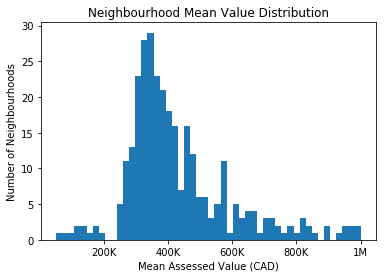

In [222]:
ax = df_grouped['value'].plot(kind='hist', range=(50000,1000000), bins=50, title='Neighbourhood Mean Value Distribution')
ax.set_ylabel('Number of Neighbourhoods')
ax.set_xlabel('Mean Assessed Value (CAD)')
ax.set_xticklabels(['50K', '200K', '400K', '600K', '800K', '1M'])

plt.savefig('neighbourhood_grouped_means_50K-1M.png')
plt.show()

# EPS Neighbourhood Criminal Incidents

In [230]:
df_crim = pd.read_csv('EPS_Neighbourhood_Criminal_Incidents.csv', dtype={'Incident Reported Year':str, 'Incident Reported Month':str})
print(df_crim.head())
print(df_crim.tail())

  Neighbourhood Description (Occurrence) UCR Violation Type Group (Incident)  \
0                           ABBOTTSFIELD                             Assault   
1                           ABBOTTSFIELD                             Assault   
2                           ABBOTTSFIELD                             Assault   
3                           ABBOTTSFIELD                             Assault   
4                           ABBOTTSFIELD                             Assault   

  Incident Reported Year Incident Reported Quarter Incident Reported Month  \
0                   2009                        Q1                       1   
1                   2009                        Q1                       2   
2                   2009                        Q1                       3   
3                   2009                        Q2                       4   
4                   2009                        Q2                       5   

   # Incidents  
0            3  
1            5  

# This dataset will require
- a dictionary of Neighbourhood Descriptions to Neighbourhood IDs
- add Neighbourhood IDs based on Neighbourhood Descriptions
- converting incident year and month to a datetime index
- a pandas groupby Neighbourhood ID and sum of the number of incidents 
- linking `df_crim` to `df` on the Neighbourhood ID axis

In [231]:
print(df_crim.columns)
df_crim.info()

Index(['Neighbourhood Description (Occurrence)',
       'UCR Violation Type Group (Incident)', 'Incident Reported Year',
       'Incident Reported Quarter', 'Incident Reported Month', '# Incidents'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99705 entries, 0 to 99704
Data columns (total 6 columns):
Neighbourhood Description (Occurrence)    99705 non-null object
UCR Violation Type Group (Incident)       99705 non-null object
Incident Reported Year                    99705 non-null object
Incident Reported Quarter                 99705 non-null object
Incident Reported Month                   99705 non-null object
# Incidents                               99705 non-null int64
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [232]:
column_list = ['nb', 'violation', 'year', 'quarter', 'month', 'num_incidents']
df_crim.columns = column_list
print(df_crim.columns)

Index(['nb', 'violation', 'year', 'quarter', 'month', 'num_incidents'], dtype='object')


In [239]:
# Add a zero padding to the front of the month column
df_crim['month'] = df_crim['month'].apply(lambda x:'{:0>2}'.format(x))

In [249]:
datetime = pd.to_datetime(df_crim['year'] + '-' + df_crim['month'], format='%Y-%m')
df_crim_date = df_crim.set_index(datetime)

In [252]:
print(df_crim.head())
drop_list = ['year', 'quarter', 'month', 'date']
df_crim_date.drop(drop_list, axis=1, inplace=True)
print(df_crim_date.head())

             nb violation  year quarter month  num_incidents       date
0  ABBOTTSFIELD   Assault  2009      Q1    01              3 2009-01-01
1  ABBOTTSFIELD   Assault  2009      Q1    02              5 2009-02-01
2  ABBOTTSFIELD   Assault  2009      Q1    03              2 2009-03-01
3  ABBOTTSFIELD   Assault  2009      Q2    04              2 2009-04-01
4  ABBOTTSFIELD   Assault  2009      Q2    05              6 2009-05-01
                      nb violation  num_incidents
2009-01-01  ABBOTTSFIELD   Assault              3
2009-02-01  ABBOTTSFIELD   Assault              5
2009-03-01  ABBOTTSFIELD   Assault              2
2009-04-01  ABBOTTSFIELD   Assault              2
2009-05-01  ABBOTTSFIELD   Assault              6


In [256]:
neighbour_dict = {1010:'ALBERTA AVENUE', 1020:'BOYLE STREET', 1030:'CENTRAL MCDOUGALL', 1070:'CROMDALE', 1080:'DELTON', 1090:'DOWNTOWN', 1100:'EASTWOOD', 1111:'BLATCHFORD AREA', 1120:'EDMONTON NORTHLANDS', 1130:'ELMWOOD PARK', 1140:'MCCAULEY', 1150:'OLIVER', 1160:'PARKDALE', 1170:'PRINCE RUPERT', 1180:'QUEEN MARY PARK', 1190:'RIVER VALLEY KINNAIRD', 1200:'RIVER VALLEY VICTORIA', 1210:'RIVERDALE', 1220:'ROSSDALE', 1230:'SPRUCE AVENUE', 1240:'VIRGINIA PARK', 1250:'WESTWOOD', 1270:'YELLOWHEAD CORRIDOR EAST', 1280:'YELLOWHEAD CORRIDOR WEST', 2010:'ABBOTTSFIELD', 2020:'BALWIN', 2030:'BANNERMAN', 2040:'BEACON HEIGHTS', 2050:'BELLE RIVE', 2060:'BELLEVUE', 2070:'BELMONT', 2080:'BELVEDERE', 2090:'BERGMAN', 2100:'BEVERLY HEIGHTS', 2110:'BRINTNELL', 2120:'CANON RIDGE', 2130:'CASSELMAN', 2145:'CLAREVIEW TOWN CENTRE', 2160:'CLOVER BAR AREA', 2230:'DELWOOD', 2241:'EAUX CLAIRES', 2251:'EBBERS', 2260:'EVANSDALE', 2270:'EVERGREEN', 2280:'FRASER', 2290:'GLENGARRY', 2311:'GORMAN', 2320:'HAIRSINE', 2330:'HIGHLANDS', 2340:'HOLLICK-KENYON', 2350:'HOMESTEADER', 2360:'INDUSTRIAL HEIGHTS', 2380:'KENNEDALE INDUSTRIAL', 2390:'KERNOHAN', 2400:'KILDARE', 2410:'KILKENNY', 2420:'KILLARNEY', 2430:'KIRKNESS', 2440:'KLARVATTEN', 2450:'LAGO LINDO', 2462:'CRYSTALLINA NERA EAST', 2463:'CRYSTALLINA NERA WEST', 2500:'MATT BERRY', 2511:'MAYLIEWAN', 2521:'MCCONACHIE AREA', 2530:'MCLEOD', 2541:'MILLER', 2550:'MONTROSE', 2560:'NEWTON', 2580:'NORTHMOUNT', 2590:'OVERLANDERS', 2600:'OZERNA', 2611:'CY BECKER', 2630:'RIVER VALLEY HERMITAGE', 2640:'RIVER VALLEY HIGHLANDS', 2650:'RIVER VALLEY RUNDLE', 2660:'RUNDLE HEIGHTS', 2670:'RURAL NORTH EAST HORSE HILL', 2671:'MARQUIS', 2681:'EDMONTON ENERGY AND TECHNOLOGY PARK', 2690:'RURAL NORTH EAST SOUTH STURGEON', 2700:'SCHONSEE', 2710:'SIFTON PARK', 2720:'YORK', 3010:'ATHLONE', 3020:'BARANOW', 3030:'BATURYN', 3040:'BEAUMARIS', 3050:'BROWN INDUSTRIAL', 3060:'CAERNARVON', 3070:'CALDER', 3080:'CANOSSA', 3090:'CARLISLE', 3111:'GRIESBACH', 3120:'CHAMBERY', 3140:'CRESTWOOD', 3150:'CUMBERLAND', 3160:'DOMINION INDUSTRIAL', 3170:'DOVERCOURT', 3180:'DUNLUCE', 3190:'ELSINORE', 3200:'GLENORA', 3210:'GROVENOR', 3220:'HAGMANN ESTATE INDUSTRIAL', 3230:'HUFF BREMNER ESTATE INDUSTRIAL', 3240:'INGLEWOOD', 3250:'KENSINGTON', 3260:'LAUDERDALE', 3270:'LAURIER HEIGHTS', 3280:'LORELEI', 3290:'MCARTHUR INDUSTRIAL', 3300:'MCQUEEN', 3310:'NORTH GLENORA', 3320:'OXFORD', 3330:'PARKVIEW', 3340:'PEMBINA', 3350:'PRINCE CHARLES', 3360:'RAMPART INDUSTRIAL', 3370:'RAPPERSWILL', 3380:'RIVER VALLEY CAPITOL HILL', 3381:'RIVER VALLEY GLENORA', 3382:'RIVER VALLEY LAURIER', 3390:'ROSSLYN', 3410:'SHERBROOKE', 3430:'WELLINGTON', 3440:'WESTMOUNT', 3450:'WOODCROFT', 3460:'ALBANY', 3470:'CARLTON', 3480:'HUDSON', 3490:'GOODRIDGE CORNERS', 4010:'ALBERTA PARK INDUSTRIAL', 4011:'ANTHONY HENDAY', 4012:'ANTHONY HENDAY SOUTH WEST', 4013:'ANTHONY HENDAY TERWILLEGAR', 4014:'ANTHONY HENDAY SOUTH', 4015:'ANTHONY HENDAY MISTATIM', 4016:'ANTHONY HENDAY CASTLEDOWNS', 4017:'ANTHONY HENDAY LAKE DISTRICT', 4018:'ANTHONY HENDAY BIG LAKE', 4019:'ANTHONY HENDAY ENERGY PARK', 4020:'ALDERGROVE', 4021:'ANTHONY HENDAY HORSE HILL', 4022:'ANTHONY HENDAY CLAREVIEW', 4023:'ANTHONY HENDAY RAMPART', 4024:'ANTHONY HENDAY SOUTH BLACKBURNE', 4030:'ARMSTRONG INDUSTRIAL', 4040:'BELMEAD', 4050:'BONAVENTURE INDUSTRIAL', 4060:'BRITANNIA YOUNGSTOWN', 4070:'CALLINGWOOD NORTH', 4080:'CALLINGWOOD SOUTH', 4090:'CANORA', 4100:'CARLETON SQUARE INDUSTRIAL', 4110:'DECHENE', 4120:'DONSDALE', 4130:'EDMISTON INDUSTRIAL', 4140:'ELMWOOD', 4150:'GAGNON ESTATE INDUSTRIAL', 4160:'GARIEPY', 4170:'GARSIDE INDUSTRIAL', 4180:'GLENWOOD', 4190:'HAWIN PARK ESTATE INDUSTRIAL', 4200:'HIGH PARK', 4210:'HIGH PARK INDUSTRIAL', 4220:'JAMIESON PLACE', 4230:'JASPER PARK', 4240:'LA PERLE', 4270:'LYMBURN', 4280:'LYNNWOOD', 4290:'MAYFIELD', 4300:'MCNAMARA INDUSTRIAL', 4310:'MEADOWLARK PARK', 4320:'MISTATIM INDUSTRIAL', 4330:'MITCHELL INDUSTRIAL', 4340:'MORIN INDUSTRIAL', 4350:'NORWESTER INDUSTRIAL', 4360:'OLESKIW', 4380:'ORMSBY PLACE', 4390:'PATRICIA HEIGHTS', 4400:'PLACE LARUE', 4410:'POUNDMAKER INDUSTRIAL', 4420:'QUESNELL HEIGHTS', 4430:'RIO TERRACE', 4440:'RIVER VALLEY LESSARD NORTH', 4451:'RIVER VALLEY OLESKIW', 4461:'THE HAMPTONS', 4462:'EDGEMONT', 4463:'RIVERVIEW AREA', 4464:'THE UPLANDS', 4466:'CAMERON HEIGHTS', 4467:'RIVER VALLEY CAMERON', 4468:'STILLWATER', 4469:'RIVER\'S EDGE', 4470:'RURAL WEST BIG LAKE', 4471:'TRUMPETER AREA', 4473:'HAWKS RIDGE', 4474:'STARLING', 4475:'KINOKAMAU PLAINS AREA', 4477:'KINGLET GARDENS', 4485:'LEWIS FARMS INDUSTRIAL', 4486:'STEWART GREENS', 4487:'SECORD', 4490:'SHEFFIELD INDUSTRIAL', 4500:'SHERWOOD', 4510:'STONE INDUSTRIAL', 4520:'SUMMERLEA', 4530:'SUNWAPTA INDUSTRIAL', 4540:'TERRA LOSA', 4551:'GRANVILLE', 4560:'THORNCLIFF', 4570:'WEDGEWOOD HEIGHTS', 4580:'WEST JASPER PLACE', 4590:'WEST MEADOWLARK PARK', 4600:'WEST SHEFFIELD INDUSTRIAL', 4610:'WESTRIDGE', 4620:'WESTVIEW VILLAGE', 4630:'WHITE INDUSTRIAL', 4640:'WILSON INDUSTRIAL', 4650:'WINTERBURN INDUSTRIAL AREA EAST', 4660:'YOUNGSTOWN INDUSTRIAL', 4670:'WINTERBURN INDUSTRIAL AREA WEST', 4700:'BRECKENRIDGE GREENS', 4710:'POTTER GREENS', 4720:'GLASTONBURY', 4730:'SUDER GREENS', 4740:'WEBBER GREENS', 4750:'ROSENTHAL', 5010:'ALLENDALE', 5020:'ASPEN GARDENS', 5030:'BEARSPAW', 5040:'BELGRAVIA', 5050:'BLACKMUD CREEK RAVINE', 5060:'BLUE QUILL', 5070:'BLUE QUILL ESTATES', 5080:'BRANDER GARDENS', 5090:'BROOKSIDE', 5100:'BULYEA HEIGHTS', 5110:'CALGARY TRAIL NORTH', 5120:'CALGARY TRAIL SOUTH', 5130:'CARTER CREST', 5151:'STRATHCONA JUNCTION', 5160:'DUGGAN', 5170:'EMPIRE PARK', 5180:'ERMINESKIN', 5190:'FALCONER HEIGHTS', 5200:'GARNEAU', 5210:'GRANDVIEW HEIGHTS', 5220:'GREENFIELD', 5230:'HENDERSON ESTATES', 5250:'KEHEEWIN', 5260:'LANSDOWNE', 5270:'LENDRUM PLACE', 5280:'MALMO PLAINS', 5290:'MCKERNAN', 5300:'OGILVIE RIDGE', 5310:'PARKALLEN', 5320:'PLEASANTVIEW', 5330:'QUEEN ALEXANDRA', 5340:'RAMSAY HEIGHTS', 5350:'RHATIGAN RIDGE', 5360:'RIDEAU PARK', 5370:'RIVER VALLEY MAYFAIR', 5380:'RIVER VALLEY TERWILLEGAR', 5390:'RIVER VALLEY WALTERDALE', 5400:'RIVER VALLEY WHITEMUD', 5401:'RIVER VALLEY FORT EDMONTON', 5405:'RIVER VALLEY WINDERMERE', 5430:'ROYAL GARDENS', 5451:'RICHFORD', 5452:'MACEWAN', 5453:'BLACKMUD CREEK', 5454:'RUTHERFORD', 5456:'HERITAGE VALLEY AREA', 5457:'CALLAGHAN', 5458:'ALLARD', 5460:'SKYRATTLER', 5462:'CHAPPELLE AREA', 5463:'DESROCHERS AREA', 5464:'HERITAGE VALLEY TOWN CENTRE AREA', 5465:'HAYS RIDGE AREA', 5466:'CASHMAN', 5467:'CAVANAGH', 5468:'GRAYDON HILL', 5469:'PAISLEY', 5470:'STEINHAUER', 5476:'MAGRATH HEIGHTS', 5477:'MACTAGGART', 5480:'STRATHCONA', 5490:'SWEET GRASS', 5505:'AMBLESIDE', 5511:'TWIN BROOKS', 5520:'UNIVERSITY OF ALBERTA', 5530:'UNIVERSITY OF ALBERTA FARM', 5540:'WESTBROOK ESTATES', 5550:'WHITEMUD CREEK RAVINE NORTH', 5560:'WHITEMUD CREEK RAVINE SOUTH', 5565:'WHITEMUD CREEK RAVINE TWIN BROOKS', 5570:'WINDERMERE', 5575:'WINDERMERE AREA', 5576:'KESWICK AREA', 5578:'GLENRIDDING HEIGHTS', 5579:'GLENRIDDING RAVINE', 5580:'WINDSOR PARK', 5590:'BLACKBURNE', 5610:'HADDOW', 5620:'HODGSON', 5630:'LEGER', 5640:'TERWILLEGAR TOWNE', 5642:'SOUTH TERWILLEGAR', 6010:'ARGYLL', 6020:'AVONMORE', 6030:'BISSET', 6040:'BONNIE DOON', 6061:'CAPILANO', 6070:'CLOVERDALE', 6090:'CORONET ADDITION INDUSTRIAL', 6100:'CORONET INDUSTRIAL', 6110:'CPR IRVINE', 6140:'CRAWFORD PLAINS', 6150:'DALY GROVE', 6160:'DAVIES INDUSTRIAL EAST', 6170:'DAVIES INDUSTRIAL WEST', 6180:'EASTGATE BUSINESS PARK', 6190:'EDMONTON RESEARCH AND DEVELOPMENT PARK', 6195:'SOUTH EDMONTON COMMON', 6200:'EKOTA', 6211:'ELLERSLIE', 6213:'SUMMERSIDE', 6214:'ELLERSLIE INDUSTRIAL', 6216:'THE ORCHARDS AT ELLERSLIE', 6230:'FOREST HEIGHTS', 6240:'FULTON PLACE', 6250:'GAINER INDUSTRIAL', 6260:'GIRARD INDUSTRIAL', 6270:'GOLD BAR', 6280:'GREENVIEW', 6290:'HAZELDEAN', 6300:'HILLVIEW', 6310:'HOLYROOD', 6320:'IDYLWYLDE', 6330:'JACKSON HEIGHTS', 6340:'KAMEYOSEK', 6350:'KENILWORTH', 6360:'KING EDWARD PARK', 6370:'KINISKI GARDENS', 6380:'LAMBTON INDUSTRIAL', 6390:'LARKSPUR', 6400:'LEE RIDGE', 6410:'MAPLE RIDGE', 6420:'MAPLE RIDGE INDUSTRIAL', 6430:'MCINTYRE INDUSTRIAL', 6441:'MAPLE', 6442:'SILVER BERRY', 6443:'TAMARACK', 6444:'LAUREL', 6445:'ASTER', 6450:'MENISA', 6460:'MEYOKUMIN', 6470:'MEYONOHK', 6480:'MICHAELS PARK', 6491:'MILL CREEK RAVINE NORTH', 6492:'MILL CREEK RAVINE SOUTH', 6510:'MILL WOODS PARK', 6520:'MILL WOODS TOWN CENTRE', 6530:'MINCHAU', 6540:'MORRIS INDUSTRIAL', 6550:'OTTEWELL', 6560:'PAPASCHASE INDUSTRIAL', 6570:'PARSONS INDUSTRIAL', 6580:'POLLARD MEADOWS', 6590:'PYLYPOW INDUSTRIAL', 6600:'RICHFIELD', 6610:'RITCHIE', 6620:'RIVER VALLEY GOLD BAR', 6630:'RIVER VALLEY RIVERSIDE', 6640:'ROPER INDUSTRIAL', 6650:'ROSEDALE INDUSTRIAL', 6660:'RURAL SOUTH EAST', 6661:'CHARLESWORTH', 6662:'WALKER', 6663:'DECOTEAU', 6665:'ANTHONY HENDAY SOUTH EAST', 6670:'SAKAW', 6680:'SATOO', 6690:'SOUTHEAST INDUSTRIAL', 6700:'STRATHCONA INDUSTRIAL PARK', 6710:'STRATHEARN', 6720:'TAWA', 6730:'TERRACE HEIGHTS', 6750:'TIPASKAN', 6760:'TWEDDLE PLACE', 6770:'WEINLOS', 6780:'WEIR INDUSTRIAL', 6790:'WILD ROSE'}

In [258]:
print(neighbour_dict[4469])

RIVER'S EDGE
